In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.close("all")

In [12]:
# This file was created in Sheets
# It could be created in Python using intervals_per_day = productivity.groupby('Start date')['task'].count()

DataPath = '/Users/briandomino/Documents/Google Data Analytics Certificate/capstone project/intervals per day.csv'
intervals_per_day = pd.read_csv(DataPath)  

In [2]:
DataPath = '/Users/briandomino/Documents/Google Data Analytics Certificate/capstone project/Dayton weather.csv'
dayton_weather = pd.read_csv(DataPath, low_memory = False)  

In [3]:
columns_to_drop = ['STATION', 'REPORT_TYPE', 'SOURCE', 'SOURCE.1', 'REPORT_TYPE.1',
                   'DailyDepartureFromNormalAverageTemperature', 'DailyPeakWindDirection',
                  'DailySustainedWindDirection']

for col in columns_to_drop:
    dayton_weather.drop(col, axis = 1, inplace = True)

In [5]:
# Find columns that are entirely NaN and drop them
empty_columns = []

for col in dayton_weather.columns:
    pct_missing = np.mean(dayton_weather[col].isnull())
    if round(pct_missing*100) == 100:
        empty_columns.append(col)

for col in empty_columns:
    dayton_weather.drop(col, axis = 1, inplace = True)

In [6]:
# Uncomment to save

# dayton_weather.to_csv('cleaned_dayton_weather.csv')

## Correlation between day length and productivity?

In [7]:
day_length = dayton_weather[['DATE', 'Sunrise', 'Sunset']].copy()

In [8]:
# Keep only the rows with sunrise times

day_length = day_length[day_length['Sunrise'].notna()]

In [9]:
# Convert DATE to just date, and times from float64 to datetime.time

day_length['DATE'] = pd.to_datetime(day_length['DATE']).dt.date

day_length['Sunrise'] = pd.to_datetime(day_length['Sunrise'], format='%H%M').dt.time

day_length['Sunset'] = pd.to_datetime(day_length['Sunset'], format='%H%M').dt.time

In [10]:
day_length = day_length.reset_index(drop=True)

In [11]:
# calculate the length of each day in minutes and add it to a new column
day_in_minutes = []
for i in range(0,len(day_length)):
    dawn = (day_length['Sunrise'][i].hour)*60 + day_length['Sunrise'][i].minute
    dusk = (day_length['Sunset'][i].hour)*60 + day_length['Sunset'][i].minute
    day_in_minutes.append(dusk - dawn)
day_length.insert(3, 'day_in_mins', day_in_minutes)

In [13]:
intervals_per_day['Date'] = pd.to_datetime(intervals_per_day['Date']).dt.date

In [14]:
day_length.rename(columns={'DATE': 'Date'}, inplace = True)

In [15]:
productivity_with_day_length = pd.merge(intervals_per_day, day_length, how = "left", on = ["Date", "Date"])

In [25]:
print('Some basic information about productivity and day length:')
print('')
print(f'*  The longest productive day was {productivity_with_day_length.day_in_mins.max()} minutes long.')
print(f'*  The shortest productive day was {productivity_with_day_length.day_in_mins.min()} minutes long.')
print(f'*  On the most productive day, you completed {productivity_with_day_length.intervals.max()} intervals.')
print(f'*  On the least productive day, you completed {productivity_with_day_length.intervals.min()} intervals.')
print(f'*  The correlation between productivity and day length is {productivity_with_day_length.day_in_mins.corr(productivity_with_day_length.intervals)}.')

Some basic information about productivity and day length:

*  The longest productive day was 899.0 minutes long.
*  The shortest productive day was 562.0 minutes long.
*  On the most productive day, you completed 22 intervals.
*  On the least productive day, you completed 1 intervals.
*  The correlation between productivity and day length is 0.10106049765195907.


<AxesSubplot:xlabel='day_in_mins', ylabel='intervals'>

<Figure size 432x288 with 0 Axes>

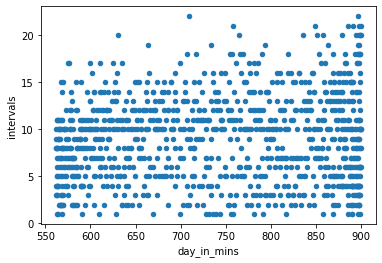

In [18]:
# Just to show why a scatterplot isn't helpful in this instance

plt.figure()
productivity_with_day_length.plot.scatter(x = 'day_in_mins', y = 'intervals')

<Figure size 432x288 with 0 Axes>

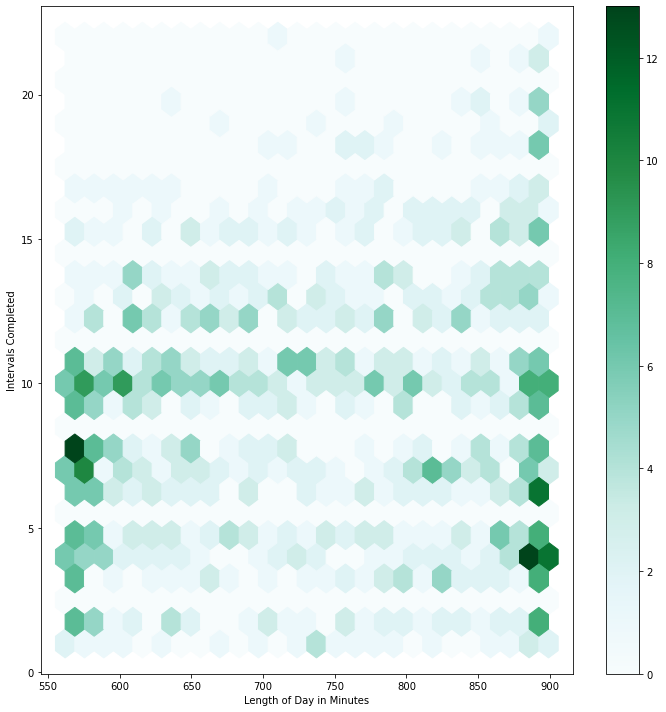

In [19]:
# Uncomment below to save plot

plt.figure()
ax = productivity_with_day_length.plot.hexbin(x = 'day_in_mins', y = 'intervals', gridsize = 25,
                                         figsize = (10,10), sharex = False)
ax.set_xlabel('Length of Day in Minutes')
ax.set_ylabel('Intervals Completed')
plt.tight_layout()
#plt.savefig('hexbin.png',dpi=300)
plt.show()